## Build a random forest classifier to predict the risk of heart disease based on a dataset of patient information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type, resting blood pressure, serum cholesterol, and maximum heart rate achieved.

#### Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?usp=share_link

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(filepath_or_buffer="./data/patient_info_dataset.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df["target"].unique()

array([1, 0], dtype=int64)

##### Considering 1 means prone to heart attack and ) being not prone to heart attack

## Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary.

##### Let's check for null values in the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

##### So there are no null values in the dataset. Hence no need for processing null data.

##### There are no categorical variables as well, hence no need for encoding the data.

##### Let's check out the scale of the values in the dataset.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


##### No need for scaling as we are going to use Random Forest which uses Decision Trees in the algorithm which do not require feature scaling

## Q2. Split the dataset into a training set (70%) and a test set (30%).

In [7]:
X = df.drop(labels="target", axis = 1)
Y = df["target"]

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(f"The train data shape:{X_train.shape}, {y_train.shape}")
print(f"The test data shape:{X_test.shape}, {y_test.shape}")

The train data shape:(212, 13), (212,)
The test data shape:(91, 13), (91,)


## Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.

In [9]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100, max_depth=10)
classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

In [10]:
y_pred = classifier.predict(X_test)

## Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score. 

In [11]:
from sklearn.metrics import classification_report, accuracy_score

report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.76      0.78      0.77        41
           1       0.82      0.80      0.81        50

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

print(f"Accuracy:{acc}")
print(f"Precision:{prec}")
print(f"Recall:{recall}")
print(f"F1_score:{f1}")

Accuracy:0.7912087912087912
Precision:0.8163265306122449
Recall:0.8
F1_score:0.8080808080808082


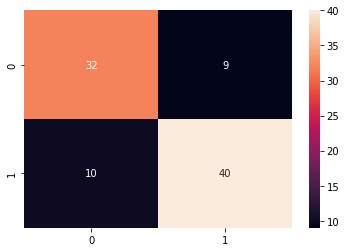

In [13]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test,y_pred)
sns.heatmap(cf, annot=True, fmt='d')
plt.show()

## Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.

In [14]:
feature_importance = classifier.feature_importances_
feature_importance

array([0.08667275, 0.02557241, 0.11896094, 0.07373607, 0.0639813 ,
       0.01176551, 0.0159478 , 0.10300143, 0.07532447, 0.10995087,
       0.05326625, 0.1316618 , 0.13015839])

In [15]:
feature_names = classifier.feature_names_in_
feature_names

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype=object)

In [16]:
features_imp = [(feature_names[i], feature_importance[i]) for i in range(len(feature_names))]
features_imp = sorted (features_imp, key = lambda x : x[1], reverse=True)
features_imp

[('ca', 0.13166179904573638),
 ('thal', 0.13015838742564814),
 ('cp', 0.11896094093399791),
 ('oldpeak', 0.10995087249436902),
 ('thalach', 0.10300143384263301),
 ('age', 0.0866727531856748),
 ('exang', 0.07532447491758754),
 ('trestbps', 0.07373606998364429),
 ('chol', 0.06398129510787925),
 ('slope', 0.053266246468507805),
 ('sex', 0.02557240853140403),
 ('restecg', 0.01594780422571428),
 ('fbs', 0.011765513837203588)]

In [17]:
feature_imp_df = pd.DataFrame(data=features_imp, columns=["feature","importance"])
feature_imp_df

,feature,importance
0,ca,0.131662
1,thal,0.130158
2,cp,0.118961
3,oldpeak,0.109951
4,thalach,0.103001
5,age,0.086673
6,exang,0.075324
7,trestbps,0.073736
8,chol,0.063981
9,slope,0.053266


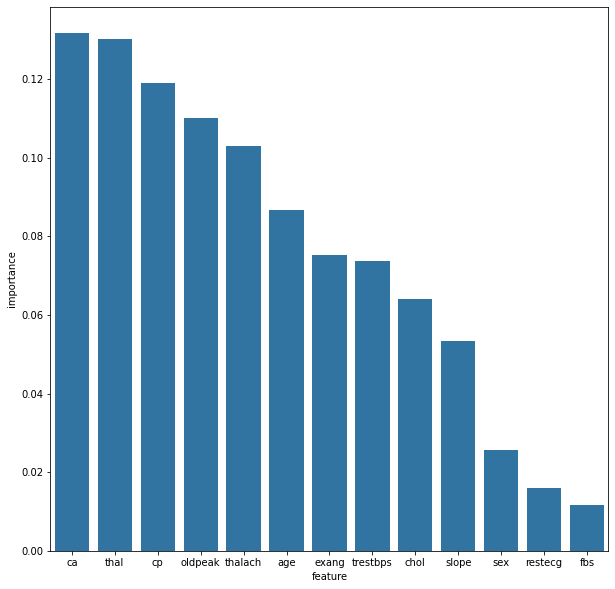

In [18]:
plt.figure(figsize=(10,10))
sns.barplot(data=feature_imp_df, x="feature",y="importance")
plt.show()

## Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

In [19]:
params_map = {
    "n_estimators": [100,150,200,250,300,350,400,450,500],
    "max_depth": [5,10,15,20,25],
    "min_samples_split": [2,3,4,5,6],
    "min_samples_leaf": [1,2,3,4,5]
}

In [20]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier()

randomizedCV = RandomizedSearchCV(estimator=rf, param_distributions=params_map, cv=5, n_iter=50, scoring="f1", verbose=3)
randomizedCV.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END max_depth=20, min_samples_leaf=1, min_samples_split=4, n_estimators=150;, score=0.837 total time=   0.0s
[CV 2/5] END max_depth=20, min_samples_leaf=1, min_samples_split=4, n_estimators=150;, score=0.857 total time=   0.0s
[CV 3/5] END max_depth=20, min_samples_leaf=1, min_samples_split=4, n_estimators=150;, score=0.776 total time=   0.0s
[CV 4/5] END max_depth=20, min_samples_leaf=1, min_samples_split=4, n_estimators=150;, score=0.870 total time=   0.0s
[CV 5/5] END max_depth=20, min_samples_leaf=1, min_samples_split=4, n_estimators=150;, score=0.762 total time=   0.0s
[CV 1/5] END max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=150;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=150;, score=0.833 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=150;, score=0.824 total time=   0.

[CV 1/5] END max_depth=5, min_samples_leaf=2, min_samples_split=6, n_estimators=500;, score=0.884 total time=   0.3s
[CV 2/5] END max_depth=5, min_samples_leaf=2, min_samples_split=6, n_estimators=500;, score=0.880 total time=   0.3s
[CV 3/5] END max_depth=5, min_samples_leaf=2, min_samples_split=6, n_estimators=500;, score=0.760 total time=   0.3s
[CV 4/5] END max_depth=5, min_samples_leaf=2, min_samples_split=6, n_estimators=500;, score=0.917 total time=   0.3s
[CV 5/5] END max_depth=5, min_samples_leaf=2, min_samples_split=6, n_estimators=500;, score=0.773 total time=   0.3s
[CV 1/5] END max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=350;, score=0.884 total time=   0.2s
[CV 2/5] END max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=350;, score=0.880 total time=   0.2s
[CV 3/5] END max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=350;, score=0.784 total time=   0.2s
[CV 4/5] END max_depth=15, min_samples_leaf=5, min_samples_sp

[CV 1/5] END max_depth=20, min_samples_leaf=4, min_samples_split=3, n_estimators=350;, score=0.864 total time=   0.2s
[CV 2/5] END max_depth=20, min_samples_leaf=4, min_samples_split=3, n_estimators=350;, score=0.880 total time=   0.2s
[CV 3/5] END max_depth=20, min_samples_leaf=4, min_samples_split=3, n_estimators=350;, score=0.784 total time=   0.2s
[CV 4/5] END max_depth=20, min_samples_leaf=4, min_samples_split=3, n_estimators=350;, score=0.917 total time=   0.2s
[CV 5/5] END max_depth=20, min_samples_leaf=4, min_samples_split=3, n_estimators=350;, score=0.744 total time=   0.2s
[CV 1/5] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=350;, score=0.864 total time=   0.2s
[CV 2/5] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=350;, score=0.880 total time=   0.2s
[CV 3/5] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=350;, score=0.800 total time=   0.2s
[CV 4/5] END max_depth=15, min_samples_leaf=2, min_sampl

[CV 1/5] END max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=400;, score=0.884 total time=   0.2s
[CV 2/5] END max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=400;, score=0.857 total time=   0.2s
[CV 3/5] END max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=400;, score=0.784 total time=   0.2s
[CV 4/5] END max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=400;, score=0.917 total time=   0.3s
[CV 5/5] END max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=400;, score=0.762 total time=   0.2s
[CV 1/5] END max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=350;, score=0.864 total time=   0.2s
[CV 2/5] END max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=350;, score=0.857 total time=   0.2s
[CV 3/5] END max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=350;, score=0.760 total time=   0.2s
[CV 4/5] END max_depth=20, min_samples_leaf=1, min_samples_sp

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5, 6],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500]},
                   scoring='f1', verbose=3)

## Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.

In [21]:
randomizedCV.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_depth': 10}

In [22]:
randomized_classifier = randomizedCV.best_estimator_

In [23]:
y_pred = randomized_classifier.predict(X_test)

In [24]:
from sklearn.metrics import classification_report, accuracy_score

report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        41
           1       0.84      0.86      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.83      0.84      0.83        91



In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc_random = accuracy_score(y_test,y_pred)
prec_random = precision_score(y_test,y_pred)
recall_random = recall_score(y_test,y_pred)
f1_random = f1_score(y_test,y_pred)

print(f"Accuracy:{acc_random}")
print(f"Precision:{prec_random}")
print(f"Recall:{recall_random}")
print(f"F1_score:{f1_random}")

Accuracy:0.8351648351648352
Precision:0.8431372549019608
Recall:0.86
F1_score:0.8514851485148515


In [27]:
dct = {
    'metrics':['accuracy','precision','recall','f1'],
    'base model':[acc,prec,recall,f1],
    'tuned model':[acc_random,prec_random,recall_random,f1_random]
}

In [28]:
df_compare = pd.DataFrame(dct)
df_compare

,metrics,base model,tuned model
0,accuracy,0.791209,0.835165
1,precision,0.816327,0.843137
2,recall,0.800000,0.860000
3,f1,0.808081,0.851485


## Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.

In [29]:
imp_tuned = randomized_classifier.feature_importances_
imp_tuned = pd.Series(imp_tuned)
imp_tuned.index = randomized_classifier.feature_names_in_
imp_tuned = imp_tuned.sort_values(ascending=False)
imp_tuned

ca          0.172678
cp          0.130095
thal        0.122261
oldpeak     0.115974
thalach     0.095668
exang       0.086962
age         0.063133
trestbps    0.055736
slope       0.053045
chol        0.049782
sex         0.032883
restecg     0.013108
fbs         0.008675
dtype: float64

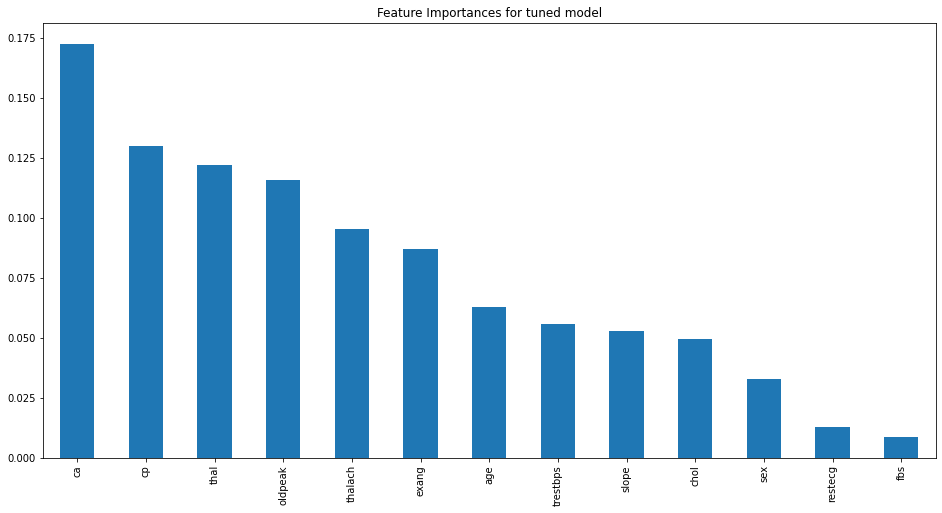

In [31]:
imp_tuned.plot(kind='bar',title='Feature Importances for tuned model',figsize=(16,8))
plt.show()

In [33]:
top2 = X_train[['ca','cp']]
top2.head()

,ca,cp
124,0,2
72,0,1
15,0,2
10,0,0
163,4,2


In [35]:
df_top2 =pd.concat([top2,y_train],axis=1)
df_top2.head()

,ca,cp,target
124,0,2,1
72,0,1,1
15,0,2,1
10,0,0,1
163,4,2,1


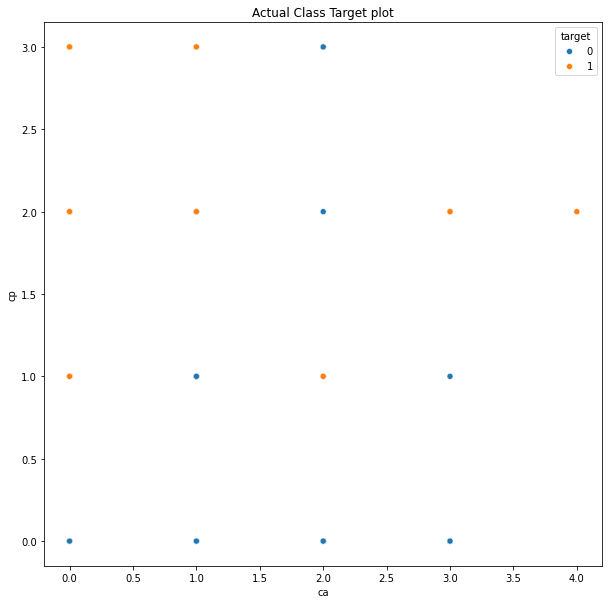

In [36]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_top2,x='ca',y='cp',hue='target')
plt.title('Actual Class Target plot')
plt.show()

In [39]:
df_top2['predicted'] = randomized_classifier.predict(X_train)
df_top2

,ca,cp,target,predicted
124,0,2,1,1
72,0,1,1,1
15,0,2,1,1
10,0,0,1,1
163,4,2,1,1
...,...,...,...,...
188,1,2,0,0
71,1,2,1,1
106,1,3,1,1
270,0,0,0,0


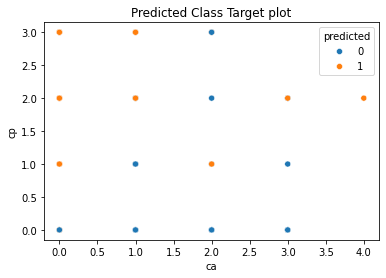

In [40]:
sns.scatterplot(data=df_top2,x='ca',y='cp',hue='predicted')
plt.title('Predicted Class Target plot')
plt.show()

##### So, we can observe that we have an almost similar pattern in both the actual and the predicted values done by the random forest classifier